In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:11<00:00, 180MB/s]
100% 1.06G/1.06G [00:11<00:00, 101MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [6]:
#generate -create labels

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [7]:
def process (image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [8]:
#Creating CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics = ['accuracy'])

In [18]:
history = model.fit(train_ds,
    epochs=10,
    validation_data=validation_ds
)

Epoch 1/10
625/625 [==============================] - 1572s 3s/step - loss: 0.4842 - accuracy: 0.7671 - val_loss: 0.3724 - val_accuracy: 0.8457
Epoch 2/10
625/625 [==============================] - 1469s 2s/step - loss: 0.3381 - accuracy: 0.8519 - val_loss: 0.2338 - val_accuracy: 0.9075
Epoch 3/10
625/625 [==============================] - 1481s 2s/step - loss: 0.2081 - accuracy: 0.9179 - val_loss: 0.1519 - val_accuracy: 0.9416
Epoch 4/10
625/625 [==============================] - 1478s 2s/step - loss: 0.1202 - accuracy: 0.9579 - val_loss: 0.1061 - val_accuracy: 0.9611
Epoch 5/10
625/625 [==============================] - 1535s 2s/step - loss: 0.0727 - accuracy: 0.9781 - val_loss: 0.1315 - val_accuracy: 0.9526
Epoch 6/10
625/625 [==============================] - 1528s 2s/step - loss: 0.0666 - accuracy: 0.9794 - val_loss: 0.0670 - val_accuracy: 0.9758
Epoch 7/10
625/625 [==============================] - 1526s 2s/step - loss: 0.0576 - accuracy: 0.9822 - val_loss: 0.1719 - val_accuracy:

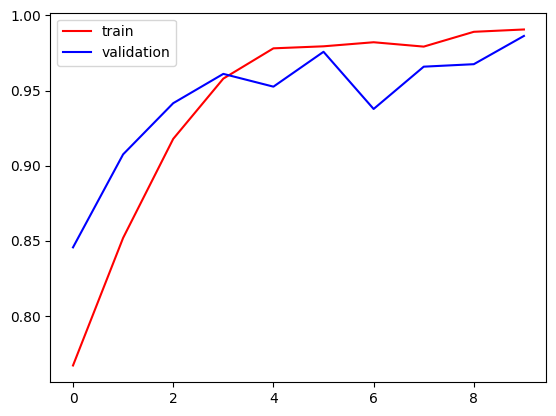

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

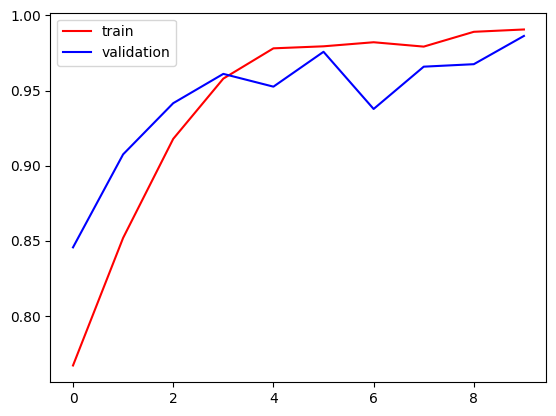

In [20]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

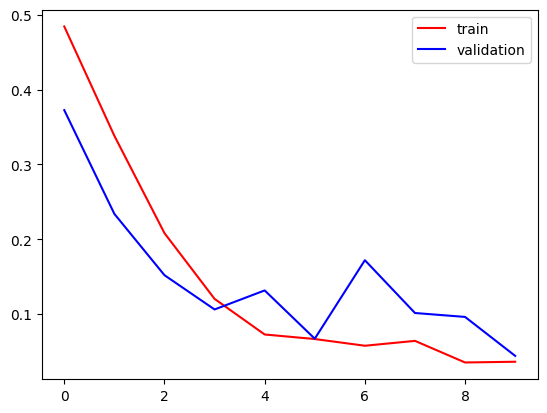

In [21]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

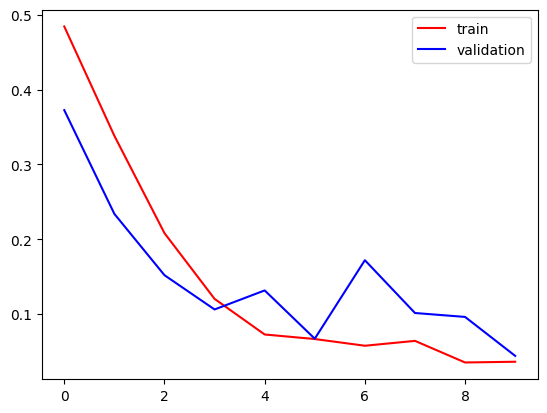

In [22]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [23]:
#need to reduce complexity

#add mode data
#reduce complexity

In [24]:
import cv2

In [27]:
test_image = cv2.imread('/content/cat.png')

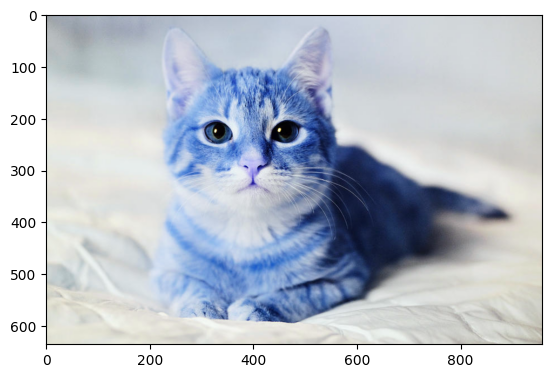

In [28]:
plt.imshow(test_image)

In [29]:
test_image.shape

(636, 958, 3)

In [30]:
test_image = cv2.resize(test_image,(256,256))

In [31]:
test_input = test_image.reshape(1,256,256,3)

In [32]:
model.predict(test_input)

1/1 [==============================] - 0s 365ms/step


array([[1.]], dtype=float32)